<a href="https://colab.research.google.com/github/susanavenda/data_cambridge/blob/main/ai_bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ⬛ **Statistical Identification Activity**

This template is designed for you to test your ability to match **Business Problems** to the correct **Statistical Tests** and **Visualizations**.




https://github.com/susanavenda/data_cambridge/blob/main/README.md

In [93]:
#first I need my libs

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

In [95]:
import kagglehub
path = kagglehub.dataset_download("asadullahcreative/ai-models-benchmark-dataset-2026-latest")
print(os.listdir(path))

# Combining the path and filename
file_full_path = os.path.join(path, 'ai_models_performance.csv')
df = pd.read_csv(file_full_path)

# Inspecting the 'ingredients' of our dataset
print("--- Column Overview ---")
df.info()

print("\n--- Data Sample ---")
df.head()

Using Colab cache for faster access to the 'ai-models-benchmark-dataset-2026-latest' dataset.
['ai_models_performance.csv']
--- Column Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model                            188 non-null    object 
 1   Context Window                   188 non-null    object 
 2   Creator                          188 non-null    object 
 3   Intelligence Index               188 non-null    object 
 4   Price (Blended USD/1M Tokens)    188 non-null    object 
 5   Speed(median token/s)            188 non-null    int64  
 6   Latency (First Answer Chunk /s)  188 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 10.4+ KB

--- Data Sample ---


,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s)
0,GPT-5.2 (xhigh),400k,OpenAI,51,$4.81,100,44.29
1,Claude Opus 4.5,200k,Anthropic,49,$10.00,79,1.70
2,Gemini 3 Pro Preview (high),1m,Google,48,$4.50,128,32.19
3,GPT-5.1 (high),400k,OpenAI,47,$3.44,127,26.50
4,Gemini 3 Flash,1m,Google,46,$1.13,224,11.62


#### **Scenario 1: The Multi-City Delivery Study**

* **The Context:** We are comparing the means of two independent groups (models from Creator A vs. models from Creator B), we use the Independent Samples t-test.

For this to work accurately, we have to look at the "Three Pillars" of the data:
The Mean ($\bar{x}$): The average speed for each creator.
The Variance ($s^2$): How much the speeds of different models (like GPT-4 vs. GPT-3.5) vary within that creator's group.
The Sample Size ($n$): How many models from each creator are in our dataset.

* **Data Points:**
Independent Variable (X): The "Version" or Group. In this case, it's the Creator (specifically comparing "OpenAI" vs. "Google").

Dependent Variable (Y): The metric we are measuring. We'll use Speed (median token/s).

Hypothesis,Conceptual Meaning,Mathematical Representation
Null (H0​),"The ""Skeptic"" view: Creator doesn't affect speed.",μOpenAI​=μGoogle​
Alternative (H1​),"The ""Discovery"" view: One creator is faster/slower.",μOpenAI​=μGoogle​

* **Your Task:**
1. **Identify the Test:** independent t test
2. **Define :** ________________
3. **Choose the Plot:** Boxplot


OpenAI models: 13
Google models: 14
ANOVA F-statistic: 0.5424
ANOVA p-value:     5.9281e-01


/tmp/ipython-input-1009480313.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Creator', y='Speed(median token/s)', data=df_filtered, palette="Set2")


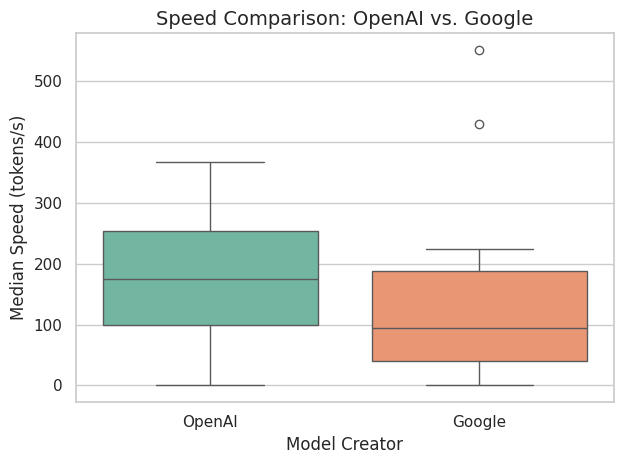


RESULT: Fail to Reject H0 - Differences are likely due to random noise.


In [100]:
#Significance Gate
#X city Categorical - 4 CAT - London, Paris, Berlin , Madrid
# Y delivery durationn is numerical continuous

# 1. Group the Y-values (Duration) by the X-categories (City)
group_openai = df[df['Creator'] == 'OpenAI']['Speed(median token/s)']
group_google = df[df['Creator'] == 'Google']['Speed(median token/s)']

# 2. Check the sizes - we need to make sure both groups actually have data!
print(f"OpenAI models: {len(group_openai)}")
print(f"Google models: {len(group_google)}")

# 2. Run the One-Way ANOVA
t_stat, p_value = stats.ttest_ind(group_openai, group_google, equal_var=False)


# 1. Strip whitespace from Creator names (removes those "hidden" spaces)
df['Creator'] = df['Creator'].str.strip()
# 2. Filter to only show the two creators we are comparing
df_filtered = df[df['Creator'].isin(['OpenAI', 'Google'])]
# 3. Output the Results
print(f"t stat F-statistic: {t_stat:.4f}")
print(f"t stat p-value:     {p_value:.4e}") # Using scientific notation for clarity

sns.boxplot(x='Creator', y='Speed(median token/s)', data=df_filtered, palette="Set2")

# 4. Add formatting to fix the "squished" look
plt.title('Speed Comparison: OpenAI vs. Google', fontsize=14)
plt.xlabel('Model Creator', fontsize=12)
plt.ylabel('Median Speed (tokens/s)', fontsize=12)

# Use tight_layout to ensure labels don't get cut off at the bottom
plt.tight_layout()
plt.show()

# 4. Your Significance Gate Logic
alpha = 0.05
if p_value < alpha:
    print("\nRESULT: Reject H0 - There is a significant difference between creators.")
else:
    print("\nRESULT: Fail to Reject H0 - Differences are likely due to random noise.")



Price correlates with better Intelligence Index

Pearson Correlation Coefficient ($r$)
The $r$ value ranges from:
+1: A perfect positive relationship (as price goes up, intelligence goes up).
0: No relationship at all.
-1: A perfect negative relationship (as price goes up, intelligence goes down).



In [112]:
# 1. Force conversion to numeric (The 'errors=coerce' part is the magic library trick)
# It turns any text like "Free" or "N/A" into a NaN that we can then drop.
df['Price_Numeric'] = pd.to_numeric(df['Price (Blended USD/1M Tokens)'].str.replace('$', '', regex=False), errors='coerce')
df['Intelligence_Numeric'] = pd.to_numeric(df['Intelligence Index'], errors='coerce')

# 2. Drop only the rows that have NaN in our two target columns
df_clean = df.dropna(subset=['Price_Numeric', 'Intelligence_Numeric']).copy()

# 3. Calculate the Best Value (Intelligence per Dollar)
# We add a tiny number (1e-9) to price to avoid dividing by zero for free models
df_clean['IQ_per_Dollar'] = df_clean['Intelligence_Numeric'] / (df_clean['Price_Numeric'] + 1e-9)

# 4. Grab the Top 5
top_value = df_clean.sort_values(by='IQ_per_Dollar', ascending=False).head(5)

print(f"Rows remaining after cleaning: {len(df_clean)}")
print("\n--- Top 5 Best Value Models ---")
print(top_value[['Model', 'Creator', 'Price_Numeric', 'Intelligence_Numeric', 'IQ_per_Dollar']])

Rows remaining after cleaning: 137

--- Top 5 Best Value Models ---
                            Model         Creator  Price_Numeric  \
22               KAT-Coder-Pro V1         KwaiKAT            0.0   
37                       K-EXAONE  LG AI Research            0.0   
49        Apriel-v1.6-15B-Thinker      ServiceNow            0.0   
61  HyperCLOVA X SEED Think (32B)           Naver            0.0   
68                Mi:dm K 2.5 Pro   Korea Telecom            0.0   

    Intelligence_Numeric  IQ_per_Dollar  
22                  36.0   3.600000e+10  
37                  32.0   3.200000e+10  
49                  28.0   2.800000e+10  
61                  24.0   2.400000e+10  
68                  23.0   2.300000e+10  


Full Dataset Correlation (r): 0.5322
Full Dataset P-value: 2.1860e-11

RESULT: Reject H0 - There is a statistically significant correlation.
Interpretation: Price is a reliable (though not perfect) predictor of Intelligence.


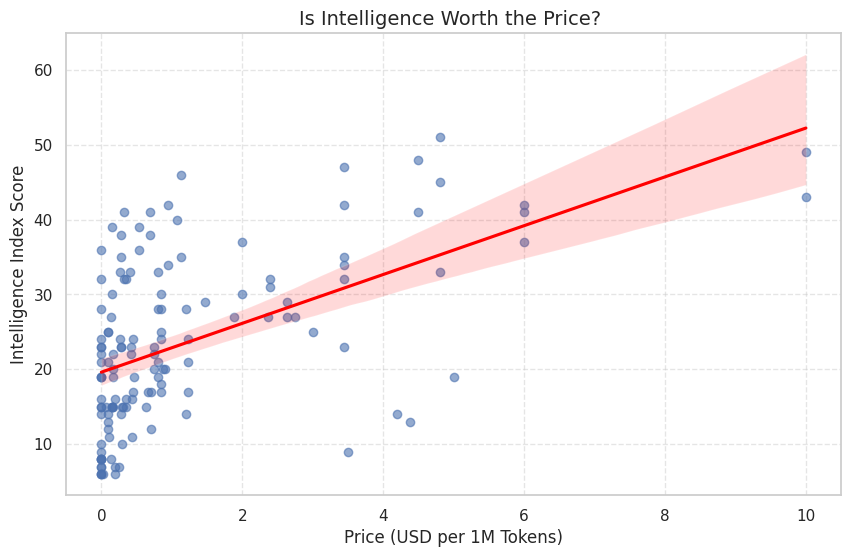

In [116]:
from scipy.stats import pearsonr

# Use the full cleaned dataset, not just the 'top_value' subset
r, p = stats.pearsonr(df_clean['Price_Numeric'], df_clean['Intelligence_Numeric'])

print(f"Full Dataset Correlation (r): {r:.4f}")
print(f"Full Dataset P-value: {p:.4e}")

#  Decision Logic
alpha = 0.05
if p < alpha:
    print("\nRESULT: Reject H0 - There is a statistically significant correlation.")
    print("Interpretation: Price is a reliable (though not perfect) predictor of Intelligence.")
else:
    print("\nRESULT: Fail to Reject H0 - No significant correlation found.")
    print("Interpretation: Any pattern seen is likely due to random chance.")

# 4. Create a Scatter Plot with a Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Price_Numeric', y='Intelligence_Numeric', data=df_clean,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Is Intelligence Worth the Price? ', fontsize=14)
plt.xlabel('Price (USD per 1M Tokens)', fontsize=12)
plt.ylabel('Intelligence Index Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [124]:
#we can calculate how much Intelligence you get for every $1 spent. "intelligence points" for every dollar you spend - inf means its free

# Create a 'Value Score'
# Intelligence per 1 Dollar (scaled for readability)
df_clean['Value_Score'] = df_clean['Intelligence_Numeric'] / df_clean['Price_Numeric']

top_creators = df_clean['Creator'].value_counts().head(5).index
value_by_creator = df_clean[df_clean['Creator'].isin(top_creators)].groupby('Creator')['Value_Score'].mean().sort_values(ascending=False)
# Inspecting the 'ingredients' of our dataset
print("--- Column Overview ---")
df_clean.info()

print("\n--- Data Sample ---")
df_clean.head()

# Let's look at the average Value Score by Creator for the top 5 most frequent creators
value_by_creator.head()

print("Average 'Intelligence per Dollar' by Creator:")
print(value_by_creator)

--- Column Overview ---
<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 181
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model                            137 non-null    object 
 1   Context Window                   137 non-null    object 
 2   Creator                          137 non-null    object 
 3   Intelligence Index               137 non-null    object 
 4   Price (Blended USD/1M Tokens)    137 non-null    object 
 5   Speed(median token/s)            137 non-null    int64  
 6   Latency (First Answer Chunk /s)  137 non-null    float64
 7   Price_Numeric                    137 non-null    float64
 8   Intelligence_Numeric             137 non-null    float64
 9   Value_Score                      137 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 11.8+ KB

--- Data Sample ---
Average 'Intelligence per Dollar' by Creator:
Cr

In [123]:
# Let's look at the actual 'smarts' vs 'value' for these creators
# Filter out the 'inf' values to see the paid model competition

paid_models = df_clean[df_clean['Price_Numeric'] > 0].copy()

# Compare Average Intelligence vs Average Value Score
comparison = paid_models[paid_models['Creator'].isin(top_creators)].groupby('Creator').agg({
    'Intelligence_Numeric': 'mean',
    'Value_Score': 'mean'
}).sort_values(by='Intelligence_Numeric', ascending=False)

print(comparison)

         Intelligence_Numeric  Value_Score
Creator                                   
OpenAI              35.583333    86.605990
Google              31.500000    68.550217
Amazon              25.100000    19.702161
Alibaba             19.952381    24.612143
Mistral             18.000000    65.461279


In [129]:
# 1. Standardizing our numeric columns (Price and Intelligence)
df['Price_Numeric'] = pd.to_numeric(df['Price (Blended USD/1M Tokens)'].str.replace('$', '', regex=False), errors='coerce')
df['Intelligence_Numeric'] = pd.to_numeric(df['Intelligence Index'], errors='coerce')
df_clean = df.dropna(subset=['Price_Numeric', 'Intelligence_Numeric']).copy()

# 2. Calculating Value Score (Intelligence / Price)
# We filter for price > 0 to avoid dividing by zero (infinity)
paid_models = df_clean[df_clean['Price_Numeric'] > 0].copy()
paid_models['Value_Score'] = paid_models['Intelligence_Numeric'] / paid_models['Price_Numeric']

# 3. Filtering for the Top 5 most frequent Creators
top_creators = paid_models['Creator'].value_counts().head(5).index
df_top = paid_models[paid_models['Creator'].isin(top_creators)]



In [130]:
# --- ANALYSIS 2: The Intelligence Ceiling (Maximum Performance) ---
# This finds the "Top Tier" model for each creator
idx = df_top.groupby('Creator')['Intelligence_Numeric'].idxmax()
ceilings = df_top.loc[idx, ['Creator', 'Model', 'Intelligence_Numeric', 'Price_Numeric']]

# Displaying results
print("--- 📦 Consistency Check (Standard Deviation) ---")
print(consistency.sort_values(by='IQ_Consistency'))

print("\n--- 🏆 Intelligence Ceiling (Top Model per Creator) ---")
print(ceilings.sort_values(by='Intelligence_Numeric', ascending=False))

--- 📦 Consistency Check (Standard Deviation) ---
         IQ_Consistency  Value_Consistency
Creator                                   
NVIDIA         4.245913          80.021922
Mistral        4.663690          42.490226
Amazon         6.118279          11.590063
Alibaba        7.214404          12.199082
OpenAI         9.903703          88.195746

--- 🏆 Intelligence Ceiling (Top Model per Creator) ---
    Creator                          Model  Intelligence_Numeric  \
0    OpenAI                GPT-5.2 (xhigh)                  51.0   
24   Amazon  Nova 2.0 Pro Preview (medium)                  35.0   
34  Alibaba             Qwen3 Max Thinking                  32.0   
51  Mistral           Magistral Medium 1.2                  27.0   
59   NVIDIA         NVIDIA Nemotron 3 Nano                  25.0   

    Price_Numeric  
0            4.81  
24           3.44  
34           2.40  
51           2.75  
59           0.10  


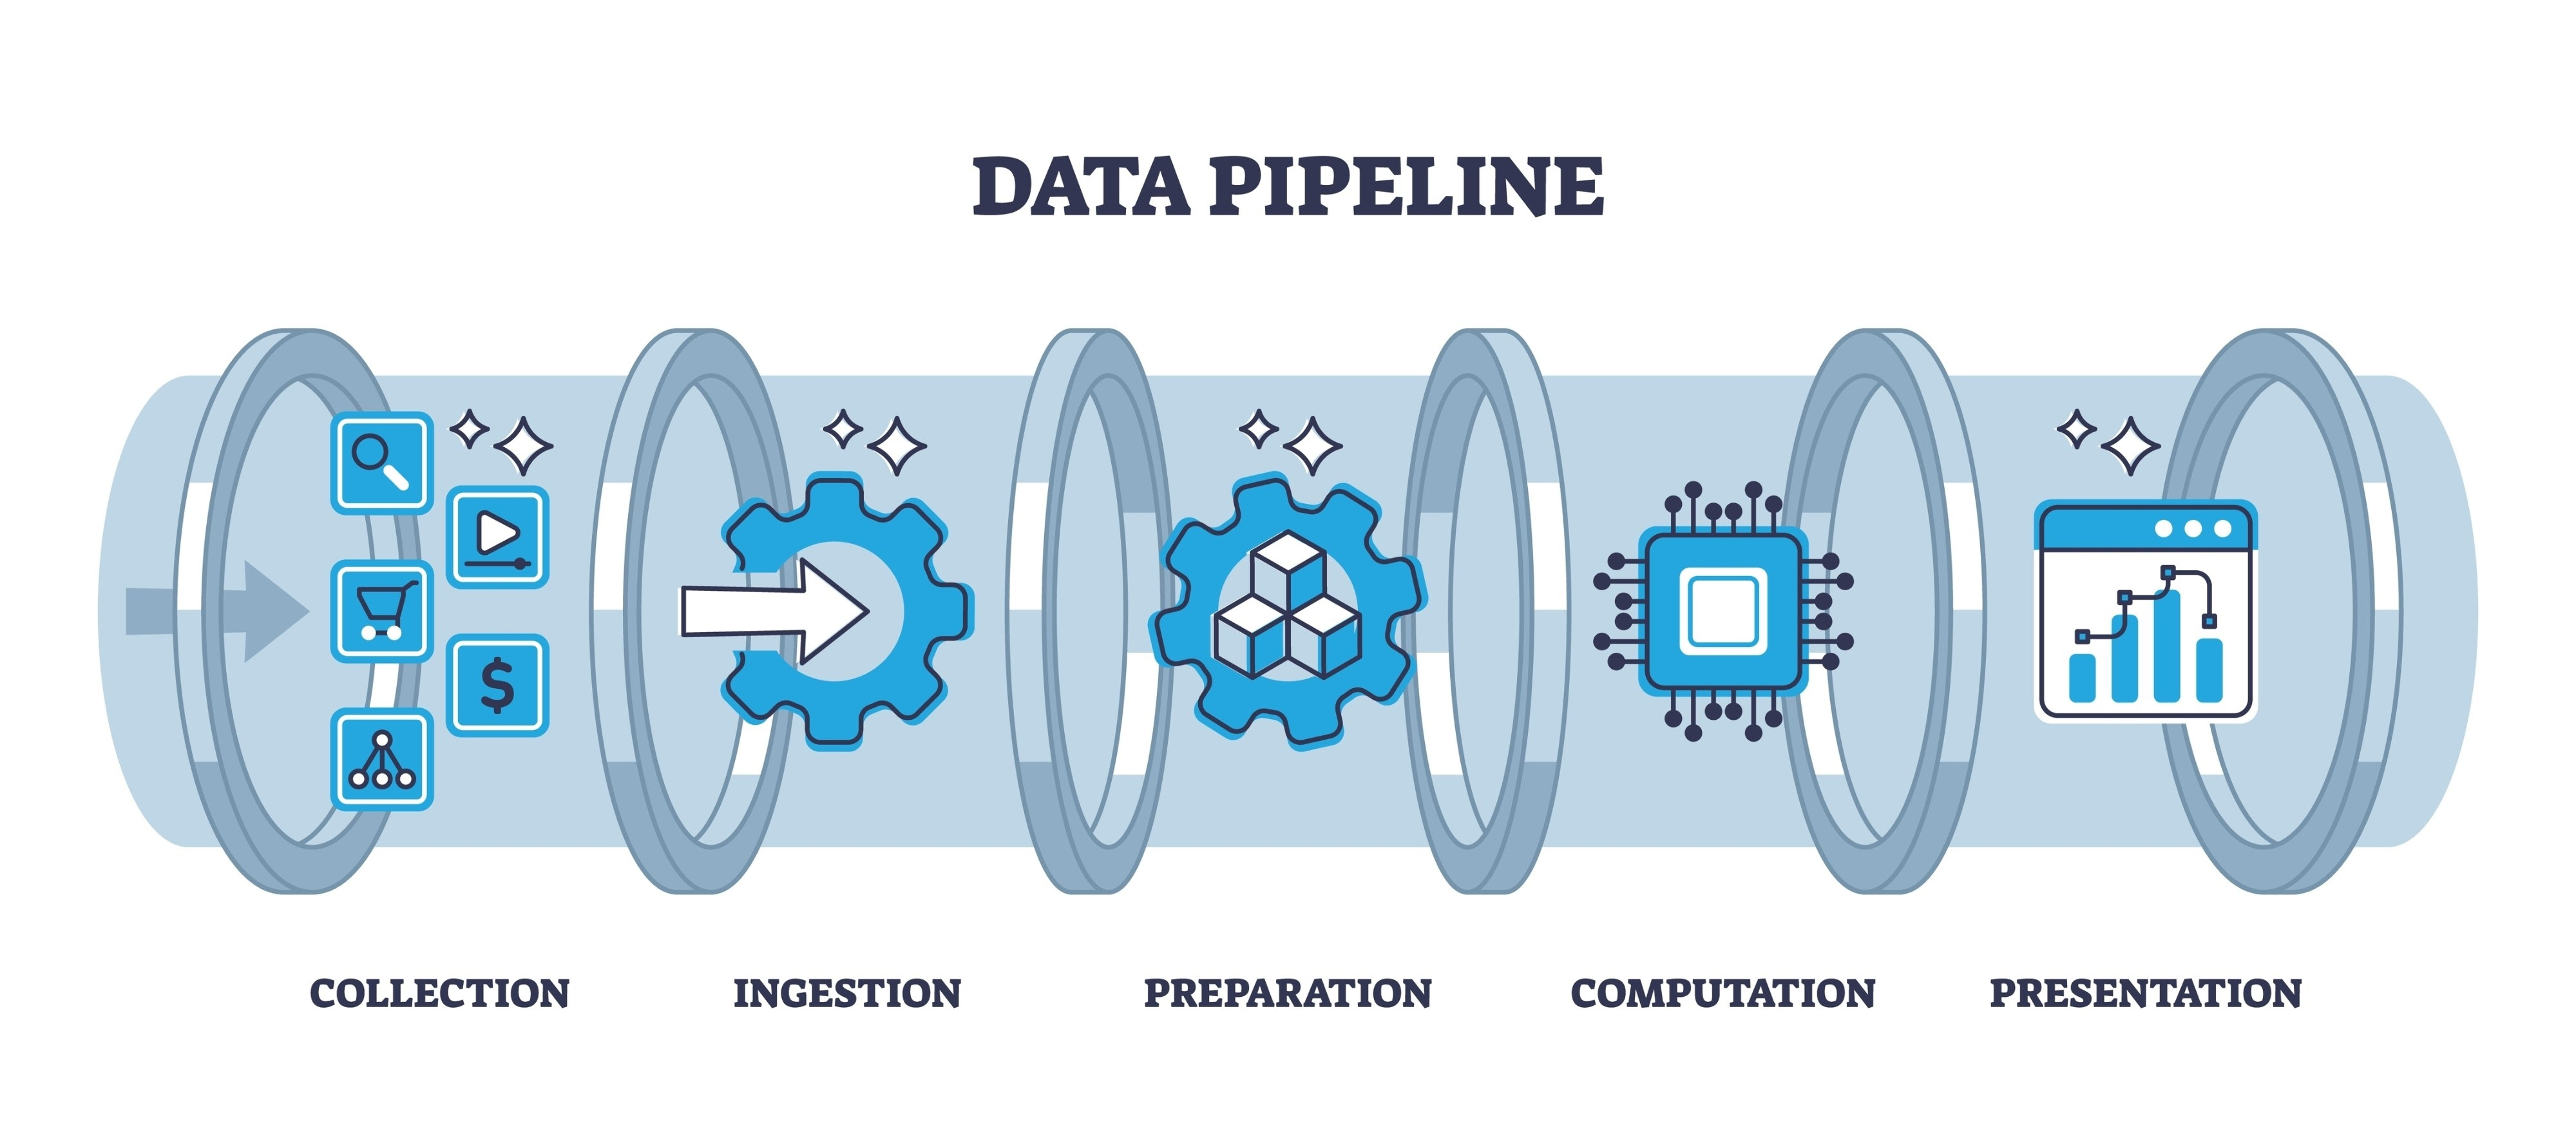

In [149]:

# 1. CLEANING FUNCTION
def clean_numeric_cols(df):
    df = df.copy()
    # Create standardized numeric columns
    df['Price_Num'] = pd.to_numeric(df['Price (Blended USD/1M Tokens)'].str.replace('$', '', regex=False), errors='coerce')
    df['IQ_Num'] = pd.to_numeric(df['Intelligence Index'], errors='coerce')
    df['Speed_Num'] = pd.to_numeric(df['Speed(median token/s)'], errors='coerce')
    return df.dropna(subset=['Price_Num', 'IQ_Num', 'Speed_Num'])

# 2. EFFICIENCY FUNCTION
def add_efficiency_metrics(df):
    df = df.copy()
    # Filter for paid models to avoid division by zero
    df = df[df['Price_Num'] > 0].copy()
    # Create metrics
    df['Value_Score'] = df['IQ_Num'] / df['Price_Num']
    df['Speed_per_Dollar'] = df['Speed_Num'] / df['Price_Num']
    return df

# 3. STATS FUNCTION
def get_creator_stats(df):
    return df.groupby('Creator').agg(
        IQ_Ceiling=('IQ_Num', 'max'),
        IQ_Std=('IQ_Num', 'std'),
        Value_Std=('Value_Score', 'std')
    ).fillna(0) # Standard deviation of 1 item is 0, not NaN


# 2. The Pipeline: One clean block of code
report = (df
          .pipe(clean_numeric_cols)
          .pipe(add_value_metrics)
          .pipe(get_creator_stats)
          .sort_values('IQ_Ceiling', ascending=False))

print(report)

                        IQ_Ceiling     IQ_Std  Value_Std
Creator                                                 
OpenAI                        51.0   9.903703  88.195746
Anthropic                     49.0   6.501282   5.943013
Google                        48.0  14.461772  71.620177
Z AI                          42.0   9.924717   8.578640
DeepSeek                      41.0   5.540758  48.799484
xAI                           41.0   7.589466  45.409925
Kimi                          40.0   8.485281   9.934740
MiniMax                       39.0   2.121320   4.002491
Xiaomi                        39.0   6.363961  42.426407
Amazon                        35.0   6.118279  11.590063
ByteDance Seed                33.0   0.000000   0.000000
Alibaba                       32.0   7.214404  12.199082
Baidu                         29.0   0.000000   0.000000
Mistral                       27.0   4.663690  42.490226
NVIDIA                        25.0   4.245913  80.021922
Prime Intellect               2

Pipeline Status: SUCCESS
                        IQ_Ceiling     IQ_Std  Value_Std
Creator                                                 
AI21 Labs                      9.0   1.414214  17.980715
Alibaba                       32.0   7.214404  12.199082
Allen Institute for AI         8.0   0.000000   0.000000
Amazon                        35.0   6.118279  11.590063
Anthropic                     49.0   6.501282   5.943013
Baidu                         29.0   0.000000   0.000000
ByteDance Seed                33.0   0.000000   0.000000
Cohere                        13.0   0.000000   0.000000
DeepSeek                      41.0   5.540758  48.799484
Google                        48.0  14.461772  71.620177
IBM                           11.0   0.000000   0.000000
Kimi                          40.0   8.485281   9.934740
LG AI Research                17.0   3.535534   5.050763
Meta                          19.0   2.380476  20.660937
MiniMax                       39.0   2.121320   4.002491
Mistra

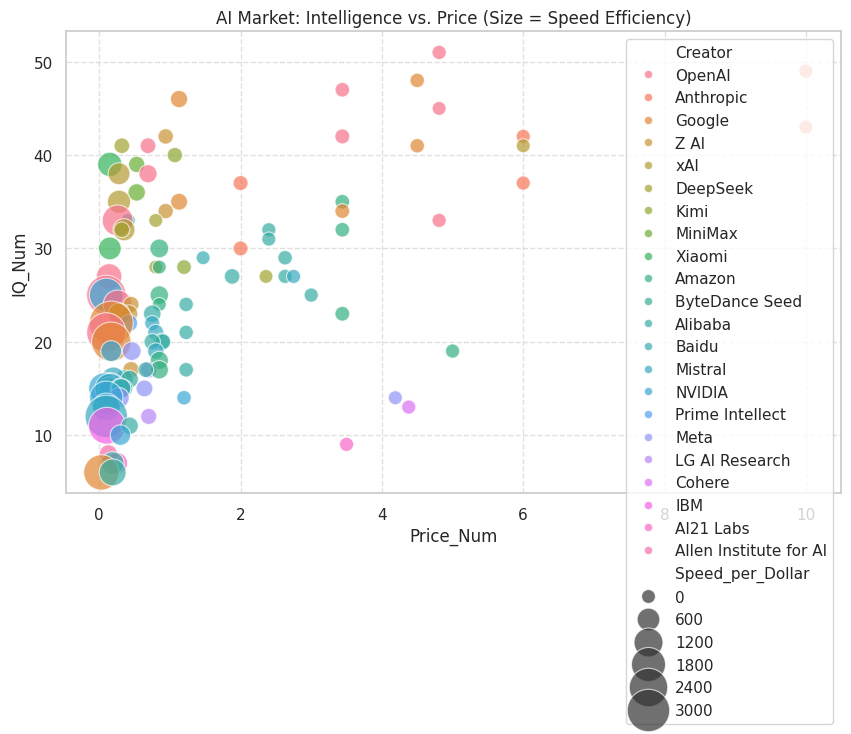

In [150]:


# --- EXECUTION PIPELINE ---

# Run the cleaning and metrics
processed_df = (df
                .pipe(clean_numeric_cols)
                .pipe(add_efficiency_metrics))

# Generate summary
summary_report = processed_df.pipe(get_creator_stats)

# Export results
processed_df.to_csv('cleaned_model_performance.csv', index=False)
summary_report.to_csv('creator_strategy_report.csv')

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_df, x='Price_Num', y='IQ_Num',
                size='Speed_per_Dollar', hue='Creator',
                sizes=(100, 1000), alpha=0.7)
plt.title('AI Market: Intelligence vs. Price (Size = Speed Efficiency)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('ai_efficiency_analysis.png')

print("Pipeline Status: SUCCESS")
print(summary_report)

Abstraction


In [161]:


# --- 1. THE DATA PREP ---
def clean_numeric_cols(df):
    df = df.copy()
    # Assuming standard Cambridge column names
    if 'Price (Blended USD/1M Tokens)' in df.columns:
        df['Price_Num'] = pd.to_numeric(df['Price (Blended USD/1M Tokens)'].astype(str).str.replace('$', '', regex=False), errors='coerce')
    if 'Intelligence Index' in df.columns:
        df['IQ_Num'] = pd.to_numeric(df['Intelligence Index'], errors='coerce')
    return df.dropna(subset=['Price_Num', 'IQ_Num'])

def add_pricing_tier(df):
    df = df.copy()
    df['Tier'] = np.where(df['Price_Num'] > 0, 'Paid', 'Free')
    return df


In [ ]:

# --- 2. THE ANALYTICS ENGINE (Abstract Path Selection) ---
def pipe_statistical_engine(df, x_col, y_col):
    x, y = df[x_col], df[y_col]
    n = len(df)
    is_x_num = pd.api.types.is_numeric_dtype(x)
    is_y_num = pd.api.types.is_numeric_dtype(y)

    # PATH: Cat vs Cat (Chi-Square)
    if not is_x_num and not is_y_num:
        contingency = pd.crosstab(x, y)
        chi2, p, _, _ = stats.chi2_contingency(contingency)
        v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
        test_name, stat, effect = "Chi-Square", chi2, v

    # PATH: Cat vs Num (ANOVA/t-test)
    elif not is_x_num and is_y_num:
        groups = [grp.values for _, grp in y.groupby(x)]
        stat, p = stats.f_oneway(*groups) if len(groups) > 2 else stats.ttest_ind(*groups)
        test_name, effect = ("ANOVA" if len(groups) > 2 else "t-test"), None

    # PATH: Num vs Num (Correlation)
    else:
        stat, p = stats.pearsonr(x, y)
        test_name, effect = "Pearson Correlation", None

    df.attrs['stats'] = {
        'test': test_name, 'stat': stat, 'p': p, 'n': n,
        'effect_size': effect, 'sig': "SIGNIFICANT" if p < 0.05 else "INSIGNIFICANT",
        'x_col': x_col, 'y_col': y_col
    }
    return df


In [ ]:

# --- 3. THE REPORT GENERATOR ---
def pipe_generate_report(df):
    s = df.attrs['stats']
    y_data = df[s['y_col']]
    is_numeric = pd.api.types.is_numeric_dtype(y_data)

    report_data = {
        "Path Taken": s['test'], "P-Value": f"{s['p']:.4e}",
        "Significance": s['sig'], "CLT Gate": "Trusted p" if s['n'] > 30 else "Bootstrap Required"
    }

    if is_numeric:
        mean, sem = np.mean(y_data), stats.sem(y_data)
        ci = stats.t.interval(0.95, s['n']-1, loc=mean, scale=sem)
        report_data["95% CI"] = (round(ci[0], 2), round(ci[1], 2))
        report_data["Risk (Spec)"] = round(mean + (2 * np.std(y_data)), 2)
    else:
        report_data["Cramér's V"] = round(s.get('effect_size', 0), 4)
        report_data["Mode"] = y_data.mode()[0]

    print(f"\n--- {s['test']} REPORT ---\n{pd.Series(report_data)}")
    return df


In [ ]:

# --- 4. THE VISUALIZER (Fixes the No-Graph issue) ---
def pipe_visualize_diagnostics(df):
    s = df.attrs['stats']
    plt.figure(figsize=(12, 5))

    # Left Plot: Relationship
    plt.subplot(1, 2, 1)
    if s['test'] == "Chi-Square":
        sns.heatmap(pd.crosstab(df[s['x_col']], df[s['y_col']]), annot=True, cmap="YlGnBu", cbar=False)
    elif "ANOVA" in s['test'] or "t-test" in s['test']:
        # Fixed FutureWarning by setting hue=x_col
        sns.boxplot(data=df, x=s['x_col'], y=s['y_col'], hue=s['x_col'], palette="viridis", legend=False)
    else:
        sns.regplot(data=df, x=s['x_col'], y=s['y_col'], line_kws={"color":"red"})
    plt.title(f"Target: {s['y_col']} ({s['sig']})")

    # Right Plot: Diagnostic
    plt.subplot(1, 2, 2)
    if pd.api.types.is_numeric_dtype(df[s['y_col']]):
        sns.histplot(df[s['y_col']], kde=True, color="purple")
        plt.title("Normality Diagnostic")
    else:
        df[s['y_col']].value_counts().plot(kind='bar', color='teal')
        plt.title("Category Frequency")

    plt.tight_layout()
    plt.show()
    return df




>>> EXECUTION 1: CATEGORICAL GATE (Chi-Square)

--- Chi-Square REPORT ---
Path Taken       Chi-Square
P-Value          3.4455e-09
Significance    SIGNIFICANT
CLT Gate          Trusted p
Cramér's V            0.847
Mode                   Paid
dtype: object


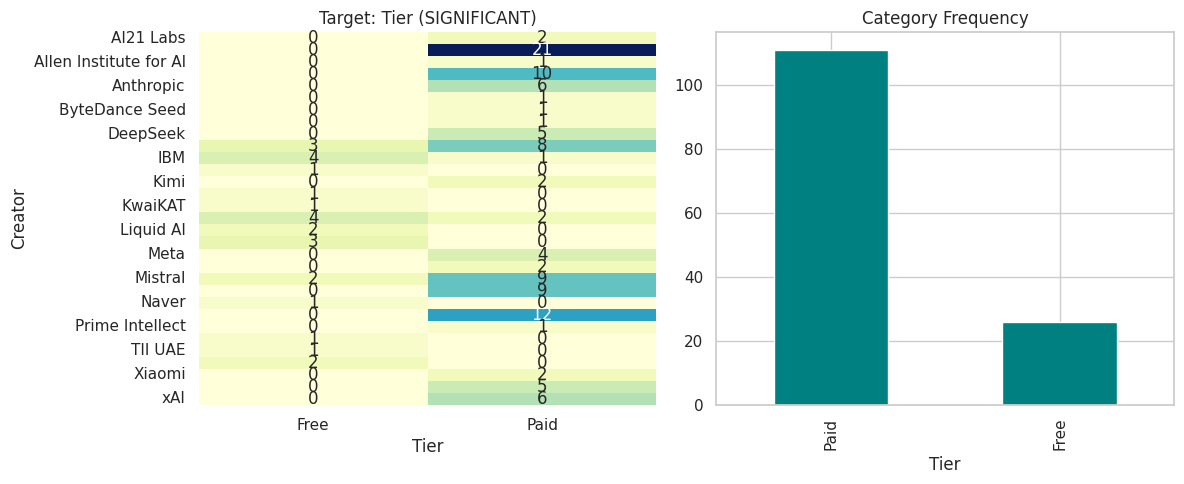

,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s),Price_Numeric,Intelligence_Numeric,Price_Num,IQ_Num,Tier
0,GPT-5.2 (xhigh),400k,OpenAI,51,$4.81,100,44.29,4.81,51.0,4.81,51.0,Paid
1,Claude Opus 4.5,200k,Anthropic,49,$10.00,79,1.70,10.00,49.0,10.00,49.0,Paid
2,Gemini 3 Pro Preview (high),1m,Google,48,$4.50,128,32.19,4.50,48.0,4.50,48.0,Paid
3,GPT-5.1 (high),400k,OpenAI,47,$3.44,127,26.50,3.44,47.0,3.44,47.0,Paid
4,Gemini 3 Flash,1m,Google,46,$1.13,224,11.62,1.13,46.0,1.13,46.0,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
177,LFM2 1.2B,33k,Liquid AI,6,$0.00,0,0.00,0.00,6.0,0.00,6.0,Free
178,Gemma 3 4B,128k,Google,6,$0.00,40,0.94,0.00,6.0,0.00,6.0,Free
179,Gemma 3n E4B,32k,Google,6,$0.03,59,0.38,0.03,6.0,0.03,6.0,Paid
180,Qwen3 0.6B,32k,Alibaba,6,$0.19,188,0.89,0.19,6.0,0.19,6.0,Paid


In [164]:


# --- EXECUTION 1: CHI-SQUARE (Categorical vs Categorical) ---
# Question: Does Creator influence if a model is Free or Paid?
print("\n>>> EXECUTION 1: CATEGORICAL GATE (Chi-Square)")
(df
 .pipe(clean_numeric_cols)
 .pipe(add_pricing_tier)
 .pipe(pipe_statistical_engine, x_col='Creator', y_col='Tier')
 .pipe(pipe_generate_report)
 .pipe(pipe_visualize_diagnostics))




>>> EXECUTION 2: COMPARISON GATE (ANOVA/t-test)

--- ANOVA REPORT ---
Path Taken               ANOVA
P-Value             3.2601e-10
Significance       SIGNIFICANT
CLT Gate             Trusted p
95% CI          (21.65, 25.44)
Risk (Spec)              45.88
dtype: object


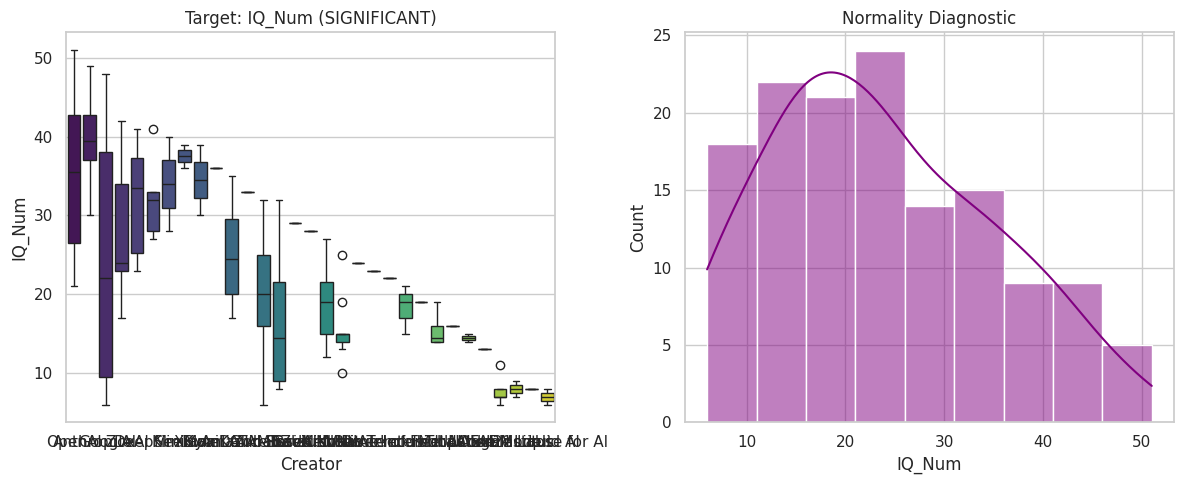

,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s),Price_Numeric,Intelligence_Numeric,Price_Num,IQ_Num
0,GPT-5.2 (xhigh),400k,OpenAI,51,$4.81,100,44.29,4.81,51.0,4.81,51.0
1,Claude Opus 4.5,200k,Anthropic,49,$10.00,79,1.70,10.00,49.0,10.00,49.0
2,Gemini 3 Pro Preview (high),1m,Google,48,$4.50,128,32.19,4.50,48.0,4.50,48.0
3,GPT-5.1 (high),400k,OpenAI,47,$3.44,127,26.50,3.44,47.0,3.44,47.0
4,Gemini 3 Flash,1m,Google,46,$1.13,224,11.62,1.13,46.0,1.13,46.0
...,...,...,...,...,...,...,...,...,...,...,...
177,LFM2 1.2B,33k,Liquid AI,6,$0.00,0,0.00,0.00,6.0,0.00,6.0
178,Gemma 3 4B,128k,Google,6,$0.00,40,0.94,0.00,6.0,0.00,6.0
179,Gemma 3n E4B,32k,Google,6,$0.03,59,0.38,0.03,6.0,0.03,6.0
180,Qwen3 0.6B,32k,Alibaba,6,$0.19,188,0.89,0.19,6.0,0.19,6.0


In [163]:
# --- EXECUTION 2: ANOVA (Categorical vs Numerical) ---
# Question: Does the Creator significantly change the Intelligence score?
print("\n>>> EXECUTION 2: COMPARISON GATE (ANOVA/t-test)")
(df
 .pipe(clean_numeric_cols)
 .pipe(pipe_statistical_engine, x_col='Creator', y_col='IQ_Num')
 .pipe(pipe_generate_report)
 .pipe(pipe_visualize_diagnostics))




>>> EXECUTION 3: CORRELATION GATE (Pearson/Spearman)

--- Pearson Correlation REPORT ---
Path Taken      Pearson Correlation
P-Value                  2.1860e-11
Significance            SIGNIFICANT
CLT Gate                  Trusted p
95% CI               (21.65, 25.44)
Risk (Spec)                   45.88
dtype: object


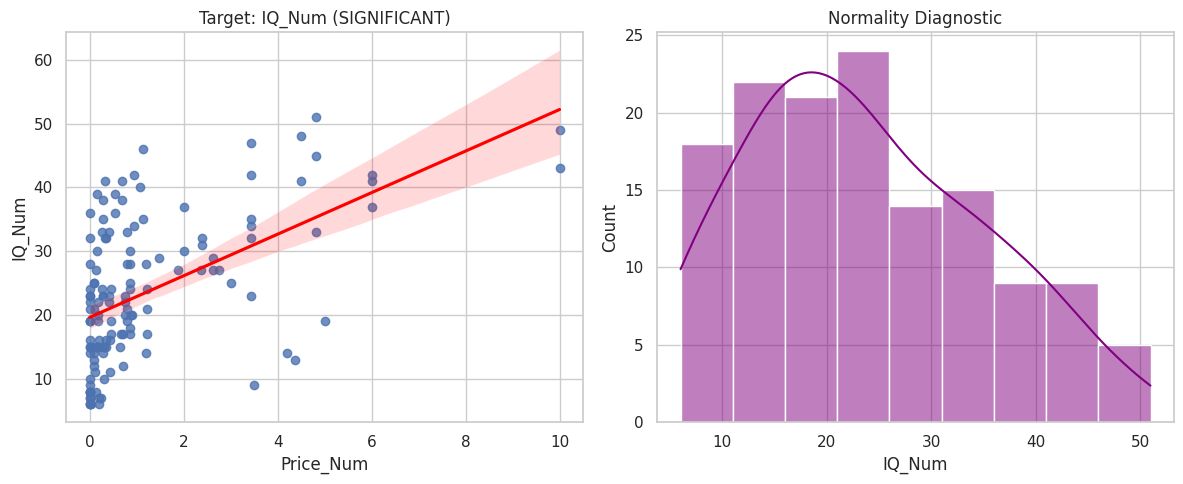

,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s),Price_Numeric,Intelligence_Numeric,Price_Num,IQ_Num
0,GPT-5.2 (xhigh),400k,OpenAI,51,$4.81,100,44.29,4.81,51.0,4.81,51.0
1,Claude Opus 4.5,200k,Anthropic,49,$10.00,79,1.70,10.00,49.0,10.00,49.0
2,Gemini 3 Pro Preview (high),1m,Google,48,$4.50,128,32.19,4.50,48.0,4.50,48.0
3,GPT-5.1 (high),400k,OpenAI,47,$3.44,127,26.50,3.44,47.0,3.44,47.0
4,Gemini 3 Flash,1m,Google,46,$1.13,224,11.62,1.13,46.0,1.13,46.0
...,...,...,...,...,...,...,...,...,...,...,...
177,LFM2 1.2B,33k,Liquid AI,6,$0.00,0,0.00,0.00,6.0,0.00,6.0
178,Gemma 3 4B,128k,Google,6,$0.00,40,0.94,0.00,6.0,0.00,6.0
179,Gemma 3n E4B,32k,Google,6,$0.03,59,0.38,0.03,6.0,0.03,6.0
180,Qwen3 0.6B,32k,Alibaba,6,$0.19,188,0.89,0.19,6.0,0.19,6.0


In [162]:
# --- EXECUTION 3: CORRELATION (Numerical vs Numerical) ---
# Question: Does Price predict Intelligence? (The "missing" execution)
print("\n>>> EXECUTION 3: CORRELATION GATE (Pearson/Spearman)")
(df
 .pipe(clean_numeric_cols)
 .pipe(pipe_statistical_engine, x_col='Price_Num', y_col='IQ_Num')
 .pipe(pipe_generate_report)
 .pipe(pipe_visualize_diagnostics))